VIOLATION CODE zip_part_1  F001  F002  F003  F004  F005   F006   F007  F008  \
0                   90001  36.0   0.0   0.0   5.0  20.0  290.0  177.0  17.0   
1                   90002   6.0   0.0   0.0   2.0   3.0   52.0   24.0   2.0   
2                   90003  21.0   0.0   0.0   7.0  18.0  292.0  172.0   8.0   
3                   90004  30.0   0.0   0.0  21.0  14.0  267.0  139.0  22.0   
4                   90005  50.0   0.0   0.0  36.0  31.0  302.0  207.0  40.0   
..                    ...   ...   ...   ...   ...   ...    ...    ...   ...   
385                 93550   0.0   1.0   0.0  10.0  11.0   79.0   96.0   5.0   
386                 93551   2.0   0.0   2.0  16.0  47.0  133.0  174.0  22.0   
387                 93552   1.0   0.0   0.0   0.0   3.0   26.0   18.0   0.0   
388                 93553   0.0   0.0   0.0   0.0   0.0    3.0    0.0   0.0   
389                 93591   0.0   0.0   0.0   1.0   0.0    6.0    8.0   0.0   

VIOLATION CODE  F009  ...  W026  W029  W031  W032  

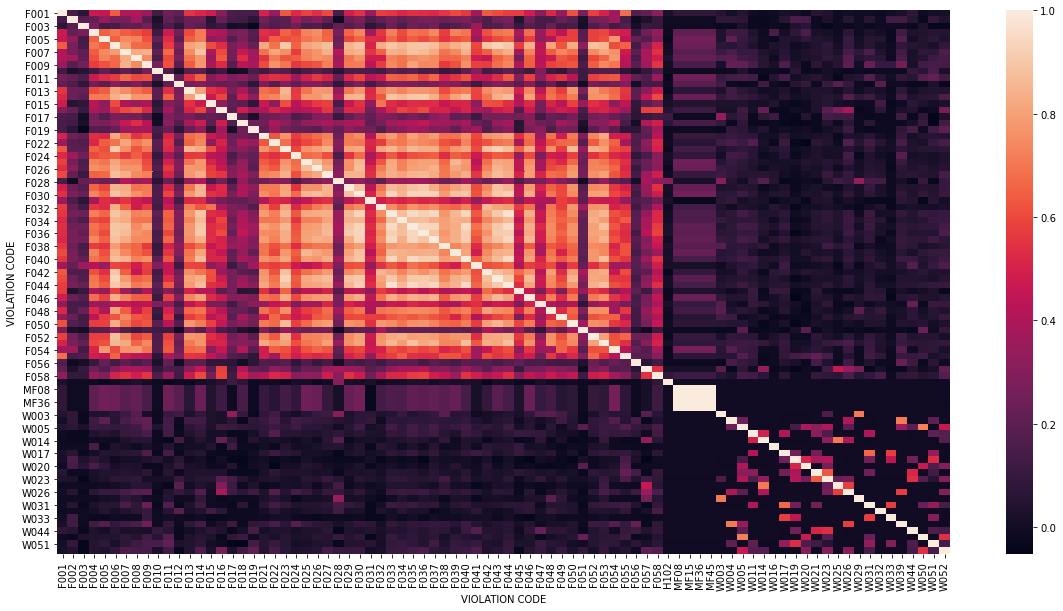

VIOLATION CODE zip_part_1  F001  F002  F003  F004  F005   F006   F007  F008  \
0                   90001  36.0   0.0   0.0   5.0  20.0  290.0  177.0  17.0   
1                   90002   6.0   0.0   0.0   2.0   3.0   52.0   24.0   2.0   
2                   90003  21.0   0.0   0.0   7.0  18.0  292.0  172.0   8.0   
3                   90004  30.0   0.0   0.0  21.0  14.0  267.0  139.0  22.0   
4                   90005  50.0   0.0   0.0  36.0  31.0  302.0  207.0  40.0   
..                    ...   ...   ...   ...   ...   ...    ...    ...   ...   
385                 93550   0.0   1.0   0.0  10.0  11.0   79.0   96.0   5.0   
386                 93551   2.0   0.0   2.0  16.0  47.0  133.0  174.0  22.0   
387                 93552   1.0   0.0   0.0   0.0   3.0   26.0   18.0   0.0   
388                 93553   0.0   0.0   0.0   0.0   0.0    3.0    0.0   0.0   
389                 93591   0.0   0.0   0.0   1.0   0.0    6.0    8.0   0.0   

VIOLATION CODE  F009  ...  W026  W029  W031  W032  

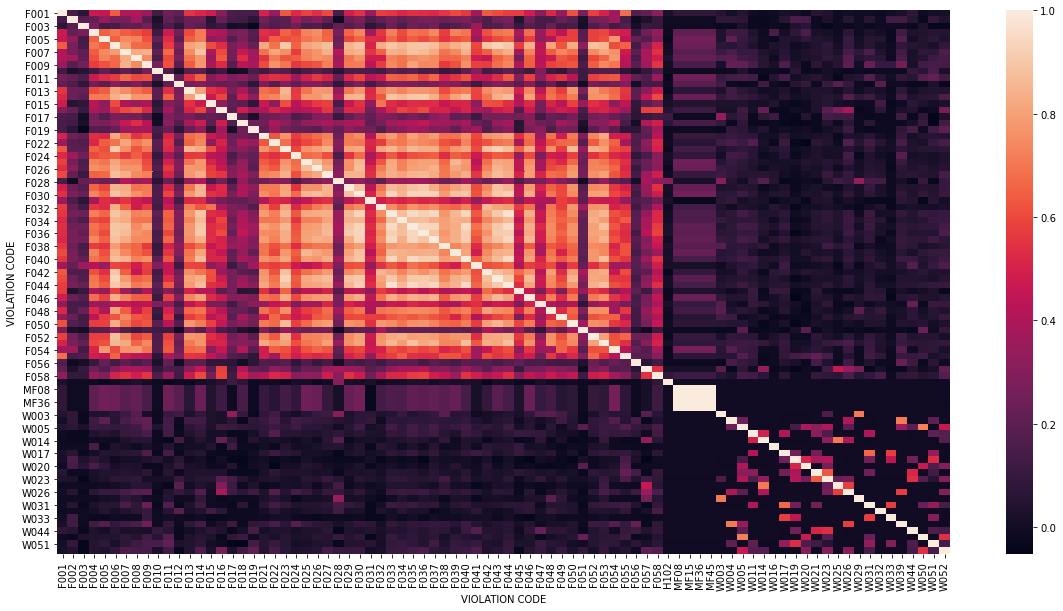

VIOLATION CODE zip_part_1  F001  F002  F003  F004  F005   F006   F007  F008  \
0                   90001  36.0   0.0   0.0   5.0  20.0  290.0  177.0  17.0   
1                   90002   6.0   0.0   0.0   2.0   3.0   52.0   24.0   2.0   
2                   90003  21.0   0.0   0.0   7.0  18.0  292.0  172.0   8.0   
3                   90004  30.0   0.0   0.0  21.0  14.0  267.0  139.0  22.0   
4                   90005  50.0   0.0   0.0  36.0  31.0  302.0  207.0  40.0   
..                    ...   ...   ...   ...   ...   ...    ...    ...   ...   
385                 93550   0.0   1.0   0.0  10.0  11.0   79.0   96.0   5.0   
386                 93551   2.0   0.0   2.0  16.0  47.0  133.0  174.0  22.0   
387                 93552   1.0   0.0   0.0   0.0   3.0   26.0   18.0   0.0   
388                 93553   0.0   0.0   0.0   0.0   0.0    3.0    0.0   0.0   
389                 93591   0.0   0.0   0.0   1.0   0.0    6.0    8.0   0.0   

VIOLATION CODE  F009  ...  W026  W029  W031  W032  

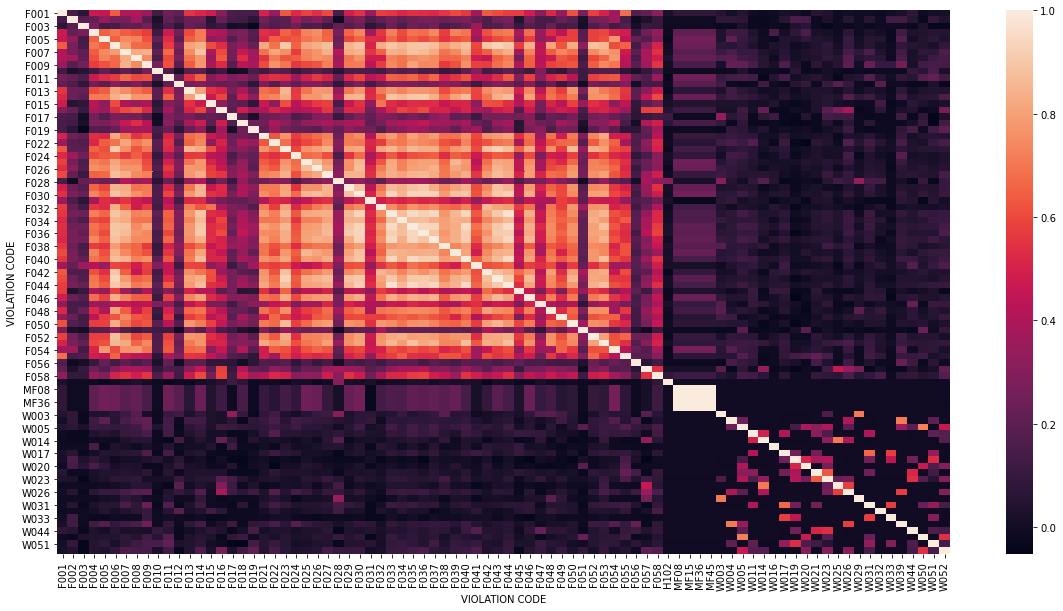

In [18]:
from tkinter import * 
from tkinter.ttk import *
from tkinter.filedialog import askopenfile 
from tkinter import filedialog
from collections import Counter
import tkinter as tk
import csv
import re
import os
import json
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import ctypes
import numpy

window = Tk()  
    
def convertFileTojson():
    
    filename = filedialog.askopenfilename(initialdir = "/", 
                                          title = "Select a File", 
                                          filetypes = (("Text files", 
                                                        "*.txt*"), 
                                                       ("all files", 
                                                        "*.*"))) 
    
    answer = os.path.basename(filename)
    
    ctypes.windll.user32.MessageBoxW(0, answer, "File Loaded:", 1)
      
    if answer == 'inspections.csv':
        ctypes.windll.user32.MessageBoxW(0, "The program will now clean your data and convert your csv into JSON", "Message", 1)
        col_list = ["ACTIVITY DATE","OWNER ID","OWNER NAME","FACILITY ID","FACILITY NAME","RECORD ID","PROGRAM NAME","PROGRAM STATUS","PROGRAM ELEMENT (PE)","PE DESCRIPTION","FACILITY ADDRESS","FACILITY CITY","FACILITY STATE","FACILITY ZIP","SERVICE CODE","SERVICE DESCRIPTION","SCORE","GRADE","SERIAL NUMBER","EMPLOYEE ID","Location","2011 Supervisorial District Boundaries (Official)","Census Tracts 2010","Board Approved Statistical Areas", "Zip Codes"]
        df = pd.read_csv(answer, usecols=col_list)
        new_col = df["PE DESCRIPTION"]
        str1 = ''.join(new_col)
        str1 = re.findall(r'\(.*?\)', str1) 
        df['NEWCOLUMN'] = pd.Series(str1)
        indexNames = df[ df['PROGRAM STATUS'] == 'INACTIVE' ].index
        df.drop(indexNames , inplace=True)
        df.to_csv(r'inspections.csv', index = False)
        csvFilePath = answer
        jsonFilePath = "inspections.json"
        with open(csvFilePath) as f:
            reader = csv.DictReader(f)
            rows = list(reader)
        with open(jsonFilePath, "w") as f:
            json.dump(rows, f, indent=4)
        
    if answer == 'inventory.csv':
        ctypes.windll.user32.MessageBoxW(0, "The program will now clean your data and convert your csv into JSON", "Message", 1)
        col_list = ["FACILITY ID","FACILITY NAME","RECORD ID","PROGRAM NAME","PROGRAM ELEMENT (PE)","PE DESCRIPTION","FACILITY ADDRESS","FACILITY CITY","FACILITY  STATE","FACILITY ZIP","FACILITY LATITUDE","FACILITY LONGITUDE","OWNER ID","OWNER NAME","OWNER ADDRESS","OWNER CITY","OWNER STATE","OWNER ZIP","Location","Census Tracts 2010","2011 Supervisorial District Boundaries (Official)","Board Approved Statistical Areas","Zip Codes"]
        df = pd.read_csv(answer, usecols=col_list)
        new_col = df["PE DESCRIPTION"]
        str1 = ''.join(new_col)
        str1 = re.findall(r'\(.*?\)', str1) 
        df['NEWCOLUMN'] = pd.Series(str1)
        indexNames = df[ df['PROGRAM STATUS'] == 'INACTIVE' ].index
        df.drop(indexNames , inplace=True)
        df.to_csv(r'inventory.csv', index = False)
        csvFilePath = answer
        jsonFilePath = "inventory.json"
        with open(csvFilePath) as f:
            reader = csv.DictReader(f)
            rows = list(reader)
        with open(jsonFilePath, "w") as f:
            json.dump(rows, f, indent=4)   
     
    if answer == 'violations.csv':
        ctypes.windll.user32.MessageBoxW(0, "The program will now convert your data into JSON", "Message", 1)
        csvFilePath = answer
        jsonFilePath = "violations.json"
        with open(csvFilePath) as f:
            reader = csv.DictReader(f)
            rows = list(reader)
        with open(jsonFilePath, "w") as f:
            json.dump(rows, f, indent=4)

def ShowStatistics():
    
     ctypes.windll.user32.MessageBoxW(0, "Getting Mean, Median and Mode...", "Message", 1) 
    
     col_list = ["ACTIVITY DATE","OWNER ID","OWNER NAME","FACILITY ID","FACILITY NAME","RECORD ID","PROGRAM NAME","PROGRAM STATUS","PROGRAM ELEMENT (PE)","PE DESCRIPTION","FACILITY ADDRESS","FACILITY CITY","FACILITY STATE","FACILITY ZIP","SERVICE CODE","SERVICE DESCRIPTION","SCORE","GRADE","SERIAL NUMBER","EMPLOYEE ID","Location","2011 Supervisorial District Boundaries (Official)","Census Tracts 2010","Board Approved Statistical Areas", "Zip Codes"]
     df = pd.read_csv("inspections.csv", usecols=col_list)

     nums = df.groupby('PE DESCRIPTION').size()
        
     x = numpy.mean(nums)
     y = numpy.median(nums)
     j = str(x)
     k = str(y)
        
     ctypes.windll.user32.MessageBoxW(0, j, "Seats Mean", 1)
     ctypes.windll.user32.MessageBoxW(0, k, "Seats Median", 1)
        
     n = len(nums) 
     data = Counter(nums)
     get_mode = dict(data) 
     mode = [k for k, v in get_mode.items() if v == max(list(data.values()))] 
        
     if len(mode) == n: 
         get_mode = "No mode found"
     else: 
         get_mode = "" + ', '.join(map(str, mode))

     l =  str(get_mode)   
      
     ctypes.windll.user32.MessageBoxW(0, l, "Seats Mode", 1)
    
     df[['zip_part_1','zip_part_2']]=df['FACILITY ZIP'].str.split('-', expand=True,n=1)
        
     nums = df.groupby('zip_part_1').size()
        
     x = numpy.mean(nums)
     y = numpy.median(nums)
     j = str(x)
     k = str(y)
        
     ctypes.windll.user32.MessageBoxW(0, j, "Zip Codes Mean", 1)
     ctypes.windll.user32.MessageBoxW(0, k, "Zip Codes Median", 1)
        
     n = len(nums) 
     data = Counter(nums)
     get_mode = dict(data) 
     mode = [k for k, v in get_mode.items() if v == max(list(data.values()))] 
        
     if len(mode) == n: 
         get_mode = "No mode found"
     else: 
         get_mode = "" + ', '.join(map(str, mode))

     l =  str(get_mode)   
      
     ctypes.windll.user32.MessageBoxW(0, l, "Zip Codes Mode", 1)
    
def displayVisualizations(): 
    
     #joining csv files
     col_list = ["ACTIVITY DATE","OWNER ID","OWNER NAME","FACILITY ID","FACILITY NAME","RECORD ID","PROGRAM NAME","PROGRAM STATUS","PROGRAM ELEMENT (PE)","PE DESCRIPTION","FACILITY ADDRESS","FACILITY CITY","FACILITY STATE","FACILITY ZIP","SERVICE CODE","SERVICE DESCRIPTION","SCORE","GRADE","SERIAL NUMBER","EMPLOYEE ID","Location","2011 Supervisorial District Boundaries (Official)","Census Tracts 2010","Board Approved Statistical Areas", "Zip Codes"]
     inspect_df = pd.read_csv("inspections.csv", usecols=col_list)       
     col_list2 = ['SERIAL NUMBER','VIOLATION  STATUS','VIOLATION CODE','VIOLATION DESCRIPTION','POINTS']   
     violate_df = pd.read_csv("violations.csv", usecols = col_list2) 
     violate_df = violate_df[~violate_df['VIOLATION CODE'].isin(violate_df['VIOLATION CODE'].value_counts().nsmallest(14).index)]     
     df_joined_data = inspect_df.join(violate_df.set_index('SERIAL NUMBER'), on='SERIAL NUMBER')
     df_joined_data[['zip_part_1','zip_part_2']]=df_joined_data['FACILITY ZIP'].str.split('-', expand=True,n=1)
     df_joined_data.head()
     vio_grouped = df_joined_data.groupby(['zip_part_1', 'VIOLATION CODE'])
     vio_counts = vio_grouped.agg({
     'VIOLATION CODE': 'count'
     })
     # matrix
     vio_matrix = vio_counts['VIOLATION CODE'].unstack(0).T
     vio_matrix.fillna(0, inplace=True)
     vio_matrix.reset_index(inplace=True)   
     vio_matrix.head()
     print(vio_matrix)
     merged = pd.concat([inspect_df, violate_df])
     # seaborn heat map   
     plt.figure(figsize=(20,10))
     sb.heatmap(vio_matrix.corr())
     plt.show()
      
b1 = Button(text="Clean/Convert Data", command=convertFileTojson)
b2 = Button(text="Show Statistics", command=ShowStatistics)
b3 = Button(text="Display Visualizations", command=displayVisualizations)

b1.pack(side=LEFT)
b2.pack(side=LEFT)
b3.pack(side=LEFT)

window.mainloop() 
